In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

# TensorFlow:
|  Concept | Description  |
|---|---|
| Static Computation Graphs  | Calculate gradient of a variable using automatic differentation |
|  Runtimes |  TensorFlow can be run in C++, JavaScript, and mobile devices (TensorFlow Lite)| 
|  TensorFlow Serving | Production deployment  |
|  TF-Agents | Reinforcement Learning  |
|  TensorFlow Hub | Pretrained models  |
|  TFX | Industrial Machine Learning  |

--    

|  Use Case | Description  |
|---|---|
| Variable creation| tf.Variable |
| Mathematical Transformations| tf.matmul |
| Backpropagation | tf.GradientTape |

# Keras:

|  Use Case | Description  |
|---|---|
| Layers| tf.keras.layers |
| Loss Functions| tf.keras.losses.sparse_categorical_crossentropy |
| Metrics | accuracy |
| Optimizer | tf.keras.optimizers.SGD |

# Tensor Variable and Constant

In [2]:
# Constant
tf.zeros(shape=(2, 1))
tf.ones(shape=(2, 2))
tf.random.uniform(shape=(2, 2), minval=0, maxval=1e-3)
tf.random.normal(shape=(2, 2), mean=0.0, stddev=1.0)

# Variable
tf_var1 = tf.Variable(initial_value=tf.ones(shape=(2, 2)))
tf_var2 = tf.Variable(initial_value=tf.random.uniform(shape=(2, 2)))

# Assign
tf_var1[1, 1].assign(3)

# Math operations
tf.square(tf_var1)  # Square
tf.sqrt(tf_var1)  # Square root

tf_var1 + tf_var2  # Add (Elementwise)
tf_var1.assign_add(tf_var2)  # tf_var1 += tf_var2

tf_var1 * tf_var1  # Multiply (Elementwise)
tf.matmul(tf_var1, tf_var1)  # Multiply (Dot Product)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 4.301762 ,  6.408036 ],
       [ 7.583983 , 12.7199955]], dtype=float32)>

# 1st Order Gradient

In [3]:
input_var = tf.Variable(initial_value=3.0)  # x
with tf.GradientTape() as tape:
    result = tf.square(input_var)  # x**2
gradient = tape.gradient(result, input_var)  # 2x

print(input_var)
print(input_var.numpy())
print(result)
print(gradient)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
3.0
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [4]:
input_const = tf.constant(value=3.0)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

print(input_const)
print(input_const.numpy())
print(result)
print(gradient)

tf.Tensor(3.0, shape=(), dtype=float32)
3.0
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


# 2nd Order Gradient

In [5]:
time = tf.Variable(initial_value=5.0)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = (1 / 2) * (3) * (time**2)  # 1/2 * a * t2
    speed = inner_tape.gradient(position, time)  # a * t
acceleration = outer_tape.gradient(speed, time)  # a

print(position)
print(speed)
print(acceleration)

tf.Tensor(37.5, shape=(), dtype=float32)
tf.Tensor(15.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)


# TensorFlow Linear Classifier

**Dataset**

In [6]:
n_samples = 1000
neg_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1.0, 0.5], [0.5, 1.0]], size=n_samples
)
neg_targets = np.zeros(shape=(n_samples, 1))
pos_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1.0, 0.5], [0.5, 1.0]], size=n_samples
)
pos_targets = np.ones(shape=(n_samples, 1))

samples = np.vstack((neg_samples, pos_samples)).astype(np.float32)
targets = np.vstack((neg_targets, pos_targets)).astype(np.float32)

pos_test_samples = np.array([[4, 0], [5, -2], [2, -1]]).astype(np.float32)
neg_test_samples = np.array([[0, 2], [1, 4], [2, 4]]).astype(np.float32)

input_dim = 2  # x, y
output_dim = 1  # y

**Exploration**

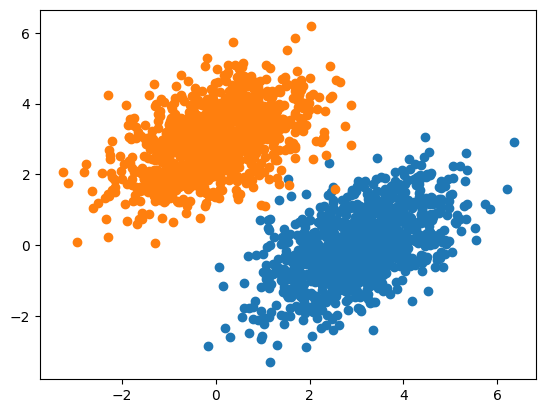

In [7]:
plt.scatter(x=pos_samples[:, 0], y=pos_samples[:, 1])
plt.scatter(x=neg_samples[:, 0], y=neg_samples[:, 1])

**Classifier**

In [8]:
class LinearClassifier:
    def __init__(self, inputs, targets, input_dim, output_dim):
        self.w = tf.Variable(tf.random.uniform((input_dim, output_dim)))
        self.b = tf.Variable(tf.zeros((output_dim,)))
        self.learning_rate = 0.1
        self.targets = targets
        self.inputs = inputs

    def fit(self):
        # ------------------------------------
        # Forward Propagation
        # ------------------------------------
        with tf.GradientTape() as tape:
            # Find prediction (no activation function is used)
            predicted_targets = tf.matmul(self.inputs, self.w) + self.b
            # Find loss (Mean Squared Error)
            predicted_loss = tf.reduce_mean(tf.square(self.targets - predicted_targets))
        # ------------------------------------
        # Backward Propagation
        # ------------------------------------
        # Find gradient
        gradient_w, gradient_b = tape.gradient(predicted_loss, [self.w, self.b])
        # Update weight and bias
        self.w.assign_sub(self.learning_rate * gradient_w)
        self.b.assign_sub(self.learning_rate * gradient_b)
        return predicted_loss

    def predict(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

    def label(self, values):
        labels = []
        for value in values.numpy():
            labels.append("Positive" if value > 0.5 else "Negative")
        return labels

    def parameters(self):
        print(self.w.numpy())
        print(self.b.numpy())


lc = LinearClassifier(samples, targets, input_dim, output_dim)

**Training**

In [9]:
print("Parameters before training: ")
# Always Random
lc.parameters()

print("Loss during training: ")
for epoch in range(100):
    loss = lc.fit()
    print(loss.numpy(), end=", ")

# Always stable
print()
print("Loss after training: ")
print(loss.numpy())

print("Parameters after training: ")
lc.parameters()

Parameters before training: 
[[0.12654543]
 [0.97790074]]
[0.]
Loss during training: 
5.4048505, 0.29963508, 0.14856021, 0.12483765, 0.11457804, 0.10637378, 0.09901402, 0.092320204, 0.086222686, 0.08066741, 0.07560602, 0.07099462, 0.06679321, 0.062965356, 0.059477806, 0.056300323, 0.05340534, 0.050767742, 0.04836465, 0.0461752, 0.04418042, 0.042362977, 0.040707123, 0.039198484, 0.037823975, 0.03657167, 0.035430703, 0.034391176, 0.033444066, 0.03258116, 0.031794976, 0.031078689, 0.030426085, 0.029831503, 0.02928978, 0.028796218, 0.028346544, 0.027936848, 0.027563572, 0.027223485, 0.026913635, 0.026631331, 0.026374126, 0.02613979, 0.025926284, 0.025731768, 0.025554543, 0.02539307, 0.025245953, 0.02511192, 0.024989802, 0.024878543, 0.024777172, 0.024684818, 0.02460067, 0.024524003, 0.024454158, 0.024390519, 0.024332538, 0.024279712, 0.024231585, 0.024187732, 0.02414778, 0.024111383, 0.02407822, 0.024048004, 0.024020478, 0.023995396, 0.023972543, 0.02395172, 0.023932755, 0.023915472, 0.023

**Prediction**

['Positive', 'Positive', 'Positive']
['Negative', 'Negative', 'Negative']


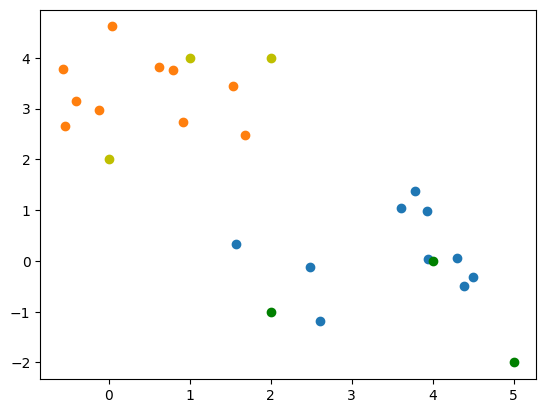

In [10]:
n_subset = 10

plt.scatter(x=pos_samples[:n_subset, 0], y=pos_samples[:n_subset, 1])
plt.scatter(x=neg_samples[:n_subset, 0], y=neg_samples[:n_subset, 1])
plt.scatter(x=pos_test_samples[:, 0], y=pos_test_samples[:, 1], c="g")
plt.scatter(x=neg_test_samples[:, 0], y=neg_test_samples[:, 1], c="y")

print(lc.label(lc.predict(pos_test_samples)))
print(lc.label(lc.predict(neg_test_samples)))

# Keras Linear Classifier

**General:**
- Layer encapsulates state (weight) and function (forward propagation)
- When implementing own layer, put the forward propagation in the call method

**Rank with layers:**
- 2: Dense
- 3: LSTM
- 3: Conv1D
- 4: Conv2D

**Optimizers (tf.keras.optimizers):**
1. SGD (with / without momentum)
2. RMSProp
3. Adam
4. Adagrad

**Loss Functions (tf.keras.losses):**
1. CategoricalCrossEntropy
2. SparseCategoricalCrossentropy
3. BinaryCrossEntropy
4. MeanSquaredError

**Metrics (tf.keras.metrics):**
1. CategoricalAccuracy
2. SparseCategoricalAccuracy
3. BinaryAccuracy
4. AUC
5. Precision
6. Recall

In [11]:
class KerasLinearClassifier:
    def __init__(self, input_size, output_size):
        self.w = tf.Variable(tf.random.uniform(shape=(input_size, output_size)))
        self.b = tf.Variable(tf.zeros(shape=(output_size,)))
        self.n = 0.1
        self.optimizer = tf.keras.optimizers.SGD(self.n)
        self.mse = tf.keras.losses.MeanSquaredError()

    def fit(self, inputs, labels):
        # ------------------------------------
        # Forward Propagation
        # ------------------------------------
        with tf.GradientTape() as tape:
            # Activations
            labels_predict = tf.matmul(inputs, self.w) + self.b
            # Mean Square Error
            loss = self.mse(labels, labels_predict)
        # ------------------------------------
        # Backward Propagation
        # ------------------------------------
        gradient = tape.gradient(loss, [self.w, self.b])
        self.optimizer.apply_gradients(zip(gradient, [self.w, self.b]))
        return loss

    def predict(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [12]:
lc = KerasLinearClassifier(input_dim, output_dim)
for epoch in range(100):
    loss = lc.fit(samples, targets)
print("w after training: ", lc.w.numpy())
print("b after training: ", lc.b.numpy())
print("loss after training: ", loss.numpy())

w after training:  [[ 0.14631256]
 [-0.15151048]]
b after training:  [0.5046045]
loss after training:  0.023750098


# Validation

**Dataset**

In [13]:
indices_permutation = np.random.permutation(len(samples))
num_validation_samples = int(0.3 * len(samples))

# Shuffled Dataset
shuffled_samples = samples[indices_permutation]
shuffled_targets = targets[indices_permutation]

# Validation Dataset
validation_samples = shuffled_samples[:num_validation_samples]
validation_targets = shuffled_targets[:num_validation_samples]

# Training Dataset
training_samples = shuffled_samples[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

**Classifier**

In [14]:
class KerasLinearClassifierV2:
    def __init__(self):
        self.model = tf.keras.Sequential(
            tf.keras.layers.Dense(units=1, activation=None)
        )
        self.model.compile(
            loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
            metrics=[tf.keras.metrics.BinaryAccuracy()],
        )

    def fit(self):
        self.history = self.model.fit(
            training_samples,
            training_targets,
            epochs=100,
            batch_size=16,
            validation_data=(validation_samples, validation_targets),
            verbose=False,
        )

    def evaluate(self, x, y):
        metrics_label = self.model.metrics_names
        metrics_value = self.model.evaluate(x=x, y=y)
        for label, value in zip(metrics_label, metrics_value):
            print("{}: {}".format(label, value))

    def predict(self, x):
        self.model.predict(x)

In [15]:
lc_kerasv2 = KerasLinearClassifierV2()
lc_kerasv2.fit()
lc_kerasv2.evaluate(validation_samples, validation_targets)
lc_kerasv2.predict(pos_test_samples)

19/19 [==============================] - 0s 296us/step - loss: 0.1012 - binary_accuracy: 0.9317
loss: 0.10122182965278625
binary_accuracy: 0.9316666722297668
1/1 [==============================] - 0s 25ms/step
